<a href="https://colab.research.google.com/github/JoeDoyle12/SportsAnalytics/blob/main/TrueShooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nba_api.stats.static import teams
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder, leaguedashteamstats, leaguestandings
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def team_ts_pct(splits, team):
    return (100*splits.PTS[team] / (2*(splits.FGA[team] + 0.44 * splits.FTA[team])))
def team_win_pct(standings, id):
    # print([team for team in standings])
    return [standings.WinPCT[team] for team in standings.index if standings.TeamID[team] == id][0]

In [ ]:
splits = leaguedashteamstats.LeagueDashTeamStats().get_data_frames()[0]
standings = leaguestandings.LeagueStandings().get_data_frames()[0]

vals = [(splits.TEAM_NAME[a[1]], team_win_pct(standings, splits.TEAM_ID[a[1]]), team_ts_pct(splits, a[1]) / 100, splits.FG_PCT[a[1]]) for a in sorted([(team_win_pct(standings, splits.TEAM_ID[team]), team) for team in splits.index], reverse=True)]

def works(v):
  return (v[1], v[2])
  # if v[0] not in ['Dallas Mavericks', 'Memphis Grizzlies'] and v[1] != .500:
  #   return (v[1], v[2])
  # else:
  #   print(v[0])
  #   return (0,0)


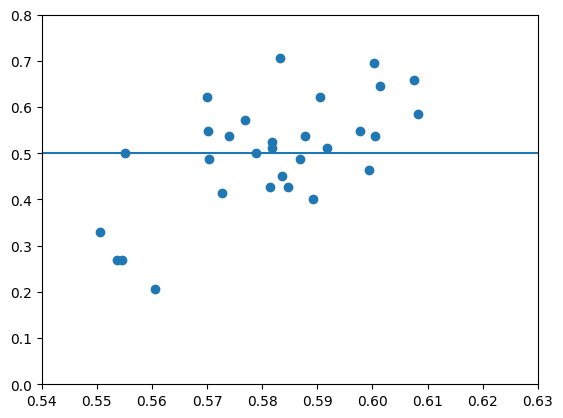

In [ ]:
winPCT = np.array([works(val)[0] for val in vals])
tsPCT = np.array([works(val)[1] for val in vals])

plt.scatter(tsPCT, winPCT)
plt.plot([.5, .5], linestyle = 'solid')
plt.xlim(0.54, 0.63)
plt.ylim(0,0.8)
plt.show()

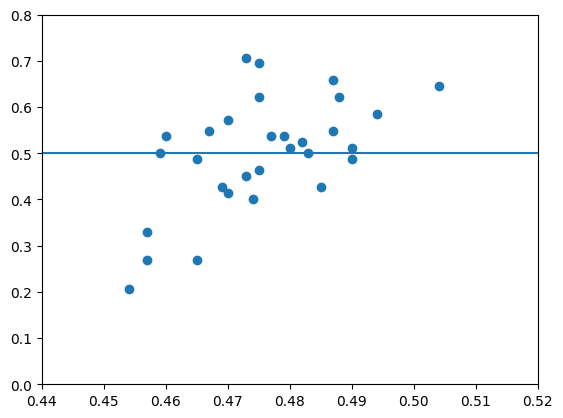

In [ ]:
tPA = np.array([val[3] for val in vals])

plt.scatter(tPA, winPCT)
plt.plot([.5, .5], linestyle = 'solid')
plt.xlim(0.44, 0.52)
plt.ylim(0,0.8)
plt.show()